w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

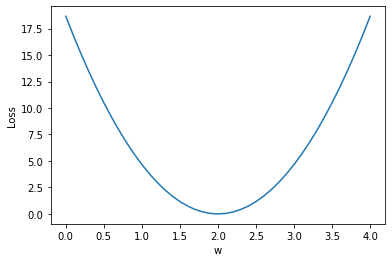

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
 
def forward(x):
    return x*w
 
 
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
 
# 穷举法
w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)
    
plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# 三维

C:\Users\86155\AppData\Local\Temp\ipykernel_24468\914706910.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


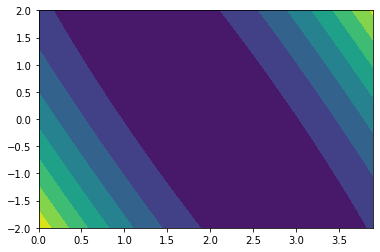

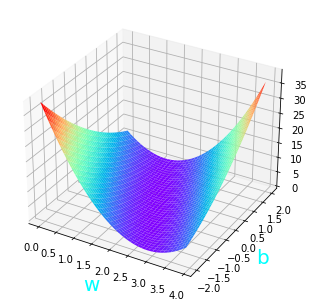

In [2]:
# Numpy
import numpy
# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


def forward(w: numpy.ndarray, b: numpy.ndarray, x: float) -> numpy.ndarray:
    return w * x + b


def loss(y_hat: numpy.ndarray, y: float) -> numpy.ndarray:
    return (y_hat - y) ** 2


w_cor = numpy.arange(0.0, 4.0, 0.1)
b_cor = numpy.arange(-2.0, 2.1, 0.1)

# 此处直接使用矩阵进行计算
w, b = numpy.meshgrid(w_cor, b_cor)
mse = numpy.zeros(w.shape)

for x, y in zip(x_data, y_data):
    _y = forward(w, b, x)
    mse += loss(_y, y)
mse /= len(x_data)

h = plt.contourf(w, b, mse)

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel(r'w', fontsize=20, color='cyan')
plt.ylabel(r'b', fontsize=20, color='cyan')
ax.plot_surface(w, b, mse, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
plt.show()

